In [1]:
!pip install kagglehub

In [2]:
import kagglehub

# Example: Load a pretrained model from KaggleHub
path = kagglehub.dataset_download("msambare/fer2013")
print('Path of the data', path)

Using Colab cache for faster access to the 'fer2013' dataset.
Path of the data /kaggle/input/fer2013


In [3]:
# Importing important libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from os import walk  # Only for counting images


In [4]:
data_train ='/kaggle/input/fer2013/train'
data_test = '/kaggle/input/fer2013/test'

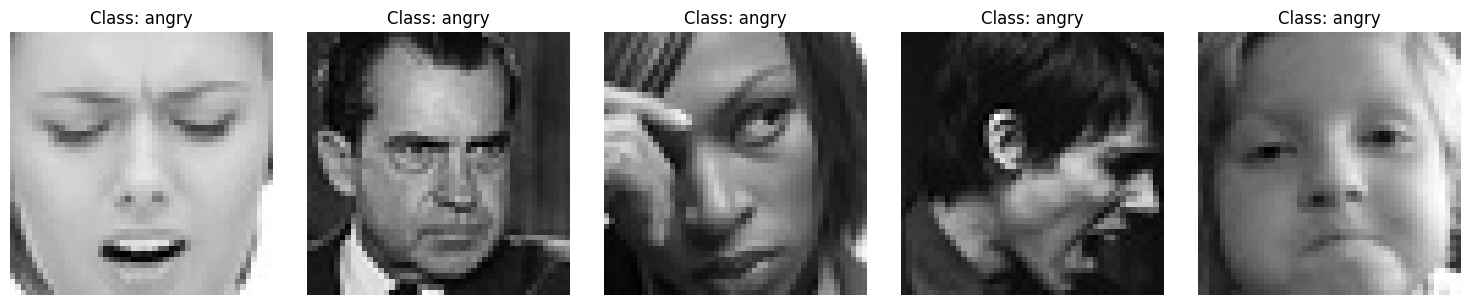

In [5]:
# Preview the images
import matplotlib.pyplot as plt
import os
from PIL import Image

# Manually pick a class and image
sample_class = os.listdir(data_train)[2]
sample_class_path = os.path.join(data_train, sample_class)

# List image files inside the class folder
image_files = os.listdir(sample_class_path)

# Load and display the first 5 images in a single row
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # 1 row, 5 columns

for i in range(5):
    image_path = os.path.join(sample_class_path, image_files[i])
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Class: {sample_class}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


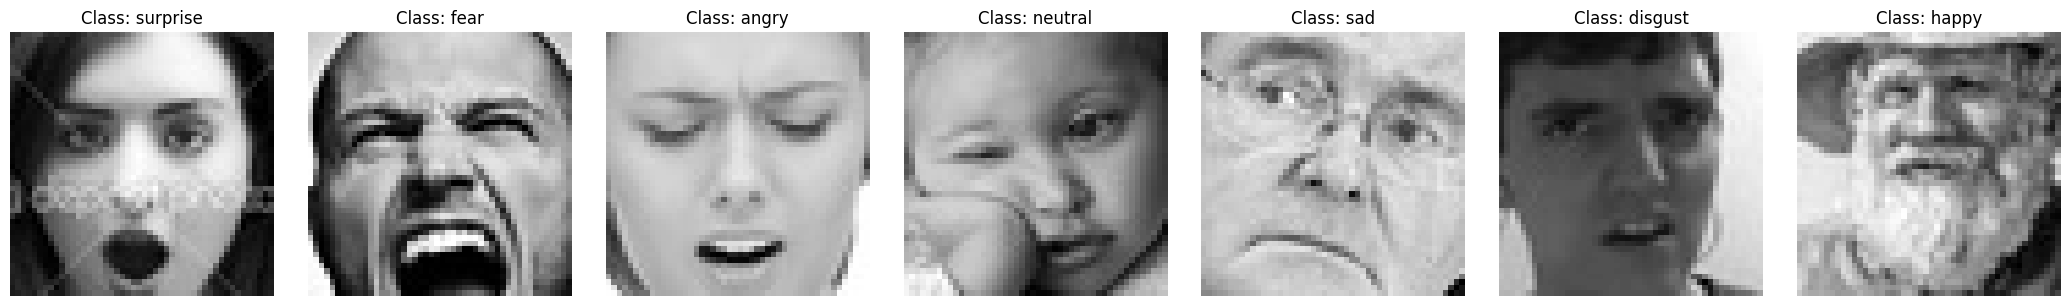

In [6]:
# Get list of all class folders
class_names = os.listdir(data_train)

# Set number of classes to display
num_classes = len(class_names)

# Create subplots: 1 row, num_classes columns
fig, axes = plt.subplots(1, num_classes, figsize=(3 * num_classes, 3))

# Loop through each class and display one image
for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_train, class_name)
    image_files = os.listdir(class_path)
    if not image_files:
        continue  # Skip if no images in folder

    image_path = os.path.join(class_path, image_files[0])
    image = Image.open(image_path).convert('L')  # Convert to grayscale

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Class: {class_name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,     # ← Shear transformation
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    data_test,
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False                # For evaluation, it's common to set shuffle=False
)

Found 7178 images belonging to 7 classes.


In [8]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    data_test,
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
def count_images(folder_path):
    return sum(len(files) for _, _, files in walk(folder_path))

num_train_imgs = count_images(data_train)
num_test_imgs = count_images(data_test)

print("Number of training images:", num_train_imgs)
print("Number of testing images:", num_test_imgs)

Number of training images: 28709
Number of testing images: 7178


In [12]:
# Training the model
epochs = 30
history = model.fit(
    train_generator,
    steps_per_epoch=num_train_imgs // 32,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=num_test_imgs // 32
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 162s 172ms/step - accuracy: 0.2536 - loss: 1.8087 - val_accuracy: 0.3094 - val_loss: 1.6996
Epoch 2/30
  1/897 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.1250 - loss: 2.0604

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1250 - loss: 2.0604 - val_accuracy: 0.3118 - val_loss: 1.6950
Epoch 3/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.3167 - loss: 1.6887 - val_accuracy: 0.4315 - val_loss: 1.4551
Epoch 4/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1875 - loss: 1.8109 - val_accuracy: 0.4351 - val_loss: 1.4538
Epoch 5/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.3855 - loss: 1.5571 - val_accuracy: 0.4714 - val_loss: 1.3529
Epoch 6/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4062 - loss: 1.3115 - val_accuracy: 0.4696 - val_loss: 1.3549
Epoch 7/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 38s 43ms/step - accuracy: 0.4327 - loss: 1.4552 - val_accuracy: 0.5120 - val_loss: 1.2720
Epoch 8/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5000 - loss: 1.3527 - val_accuracy: 0.5133 - val_loss: 1.2713
Epoch 9/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 38s 43ms/step - accuracy: 0.4657 - loss: 1.3877 - val_accuracy: 0.529

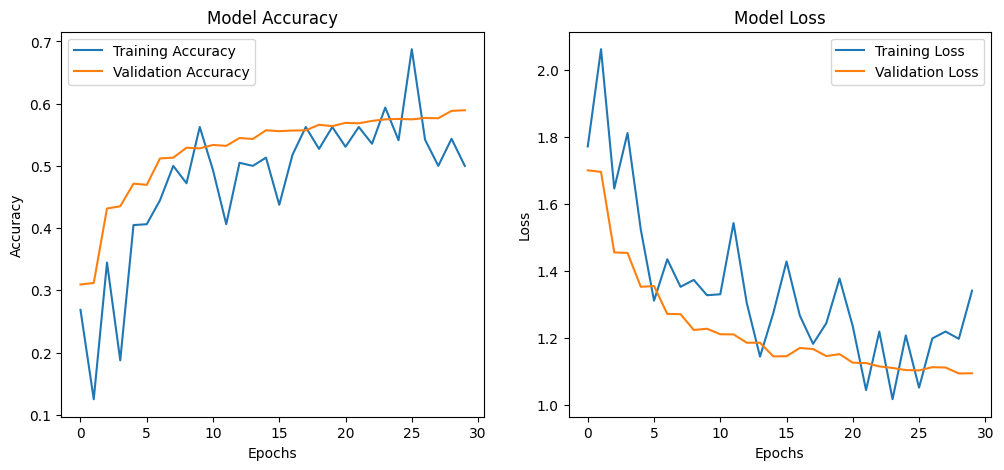

In [13]:
# Plotting the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


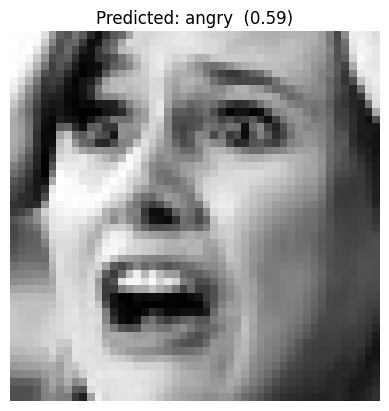

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


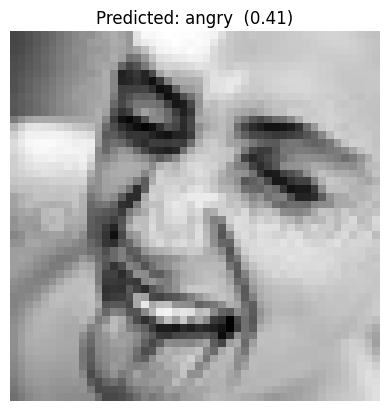

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


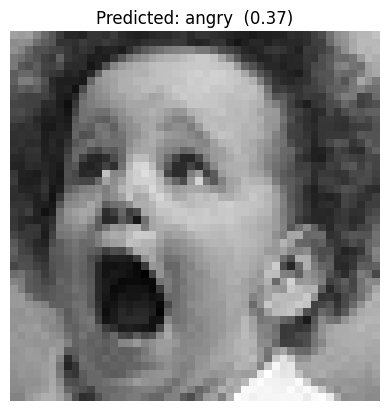

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


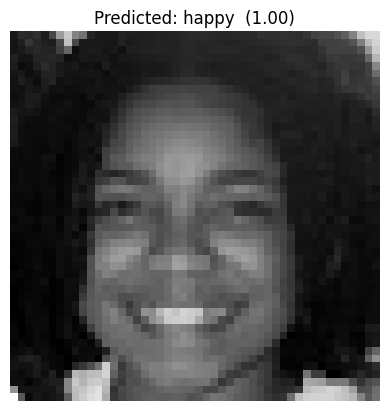

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


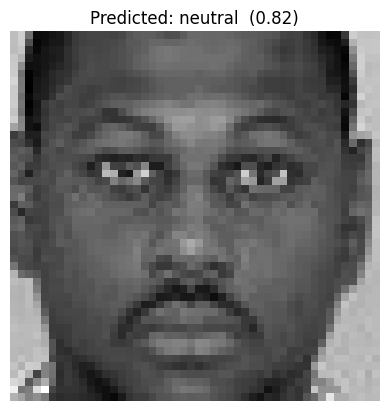

In [14]:
# -----------------------------------------
# Example Predictions on Test Images
# -----------------------------------------

import numpy as np

# Map class index to label
class_labels = list(validation_generator.class_indices.keys())

def predict_single_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((48, 48))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 48, 48, 1)

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction)

    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {predicted_class}  ({confidence:.2f})")
    plt.axis('off')
    plt.show()


# Pick a few example images from the test set
example_paths = []
for class_name in class_labels:
    class_path = os.path.join(data_test, class_name)
    files = os.listdir(class_path)
    if files:
        example_paths.append(os.path.join(class_path, files[0]))  # first image in each class

# Show predictions
for img_path in example_paths[:5]:   # show 5 examples
    predict_single_image(img_path)
